<a href="https://colab.research.google.com/github/ccopenh1/personal-projects/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The Walkability Index dataset aims to characterize every Census 2019 block group in the United States based on its relative walkability. Walkability, in this context, is defined by the characteristics of the built environment that influence the likelihood of walking as a mode of travel. The problem addressed by this dataset is the need to assess and quantify the walkability of different areas, allowing for a comprehensive understanding of the factors that contribute to or hinder walking as a means of transportation.

The project's goal is to provide a standardized measure, the Walkability Index, which is derived from the Smart Location Database (SLD). The SLD contributes four variables to the index, each weighted in a specific formula to create a new metric that represents the walkability of a given block group. The dataset utilizes block group boundary definitions from Census 2019, ensuring compatibility with existing demographic and geographic information.

In summary, the project seeks to answer questions related to the walkability of different regions in the U.S. by developing a standardized index that combines environmental factors influencing walking behaviors. Researchers and policymakers can use this information to better understand the characteristics that contribute to walkability and implement measures to enhance it in various communities.





**Link to dataset:** https://catalog.data.gov/dataset/walkability-index1

**EPA National Walkability Index Methodology and User Guide can be downloaded from this link for reference*

# IMPORTANT INFORMATION ABOUT THE DATA

D2A_Ranked:

*   Employment and household mix (SLD variable D2a_EpHHm) = The mix of
employment types and occupied housing.

D2B_Ranked:
*   Employment mix (SLD variable D2b_E8MixA) = The mix of employment types in a
block group (such as retail, office, or industrial).


D3B_Ranked:

*   Intersection density (SLD variable D3b).  

D4A_Ranked:



*   Proximity to transit stops (SLD variable D4a) = Distance from population center to nearest
transit stop in meters.



***Final National Walkability Index score*** = (w/3) + (x/3) + (y/6) + (z/6)

Where

w = block group’s ranked score for intersection density

x = block group’s ranked score for proximity to transit stops

y = block group’s ranked score for employment mix

z = block group’s ranked score for employment and household mix


**The block groups are assigned their final National Walkability Index scores on a scale of 1 to 20. The scores are categorized as follows:**

1 - 5.75 = Least Walkable
5.76 - 10.5 = Below Average Walkable
10.51 - 15.25 = Above Average Walkable
15.26 - 20 = Most Walkable

# Data Preprocessing

Data Cleaning: I used **.isna()** to identify null values in the dataset, and **.dropna** to remove these insignificant values and reduce the size of the dataset.


Data Splitting: Slicing and Filtering the DataFrame with conditionals can help to precicely access certain parts of the data, which is extremely useful with such a colossal dataset. I filtered the data by Final National Walkability Index score and the four selected variables that are used to compute the Final National Walkability Index score and split the data into four seperate DataFrames to categorize each location based on the ranges of Walkability score previously defined above.


Data Reduction: Reducing the dimensionality of the dataset while retaining its essential information. Due to the massive size of this dataset (220740 rows and 117 columns!!), it would take some impressive computing power to generate pairplot visualizations for every entry of this dataset without taking 1000 years to do so. Therefore, I scaled my DataFrames and visualizations appropriately.

# Playing Around with the Data

In [1]:
!pip install numpy pandas matplotlib seaborn #install packages for Data Understanding and Visualization

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns #Import packages

In [3]:
walkability_df = pd.read_csv("EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv")

In [4]:
walkability_df.head() #Peeking at the first five rows of the dataset

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


In [5]:
# get the data type for each column.
walkability_df.dtypes

OBJECTID          int64
GEOID10         float64
GEOID20         float64
STATEFP           int64
COUNTYFP          int64
                 ...   
D3B_Ranked        int64
D4A_Ranked        int64
NatWalkInd      float64
Shape_Length    float64
Shape_Area      float64
Length: 117, dtype: object

In [6]:
# get a list-like object (Index) of the columns. This is an iterable object.
walkability_df.columns

Index(['OBJECTID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA',
       ...
       'D5DRI', 'D5DE', 'D5DEI', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked',
       'D4A_Ranked', 'NatWalkInd', 'Shape_Length', 'Shape_Area'],
      dtype='object', length=117)

In [9]:
walkability_df.shape # A particularly massive dataset! 220,740 rows and 117 columns

(220740, 117)

In [10]:
walkability_df.describe # some statistical information on the numerical columns.

<bound method NDFrame.describe of         OBJECTID       GEOID10       GEOID20  STATEFP  COUNTYFP  TRACTCE  \
0              1  4.811300e+11  4.811300e+11       48       113     7825   
1              2  4.811300e+11  4.811300e+11       48       113     7825   
2              3  4.811300e+11  4.811300e+11       48       113     7825   
3              4  4.811300e+11  4.811300e+11       48       113     7824   
4              5  4.811300e+11  4.811300e+11       48       113     7824   
...          ...           ...           ...      ...       ...      ...   
220735    220736  7.803100e+11  7.803100e+11       78        30   961000   
220736    220737  7.803100e+11  7.803100e+11       78        30   961000   
220737    220738  7.803100e+11  7.803100e+11       78        30   961000   
220738    220739  7.803100e+11  7.803100e+11       78        30   960700   
220739    220740  7.803100e+11  7.803100e+11       78        30   960200   

        BLKGRPCE    CSA                  CSA_Name    

In [11]:
walkability_df.isna().sum()

OBJECTID        0
GEOID10         1
GEOID20         0
STATEFP         0
COUNTYFP        0
               ..
D3B_Ranked      0
D4A_Ranked      0
NatWalkInd      0
Shape_Length    0
Shape_Area      0
Length: 117, dtype: int64

In [12]:
len(walkability_df)

220740

In [13]:
walkability_df = walkability_df.dropna(axis=0)

In [14]:
len(walkability_df) #53,475 rows dropped, almost a quarter of the data... thats a LOT of null values yikes

167265

In [15]:
walkability_df['STATEFP'] # get the column with state information. states are assigned an integer value

0         48
1         48
2         48
3         48
4         48
          ..
220646    72
220647    72
220648    72
220649    72
220650    72
Name: STATEFP, Length: 167265, dtype: int64

In [16]:
walkability_df['COUNTYFP'] # get the column with county information. counties are assigned an integer value

0         113
1         113
2         113
3         113
4         113
         ... 
220646     21
220647     21
220648     21
220649     53
220650     53
Name: COUNTYFP, Length: 167265, dtype: int64

In [17]:
walkability_df[walkability_df['STATEFP'] == 48] #state of texas is 48

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,2.978361e+05
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,4.849451e+05
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,1.067059e+05
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,4.818284e+05
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,6.876848e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15806,15807,4.847180e+11,4.847180e+11,48,471,790101,2,288.0,"Houston-The Woodlands, TX",26660.0,...,-99999.000000,-99999.000000,-99999.000000,5,2,3,1,2.500000,20478.819380,1.115748e+07
15807,15808,4.847180e+11,4.847180e+11,48,471,790102,1,288.0,"Houston-The Woodlands, TX",26660.0,...,-99999.000000,-99999.000000,-99999.000000,3,10,4,1,3.833333,37075.774520,5.846214e+07
15808,15809,4.847180e+11,4.847180e+11,48,471,790101,3,288.0,"Houston-The Woodlands, TX",26660.0,...,-99999.000000,-99999.000000,-99999.000000,2,6,1,1,2.000000,102762.232600,2.981672e+08
15809,15810,4.821500e+11,4.821500e+11,48,215,24600,1,365.0,"McAllen-Edinburg, TX",32580.0,...,-99999.000000,-99999.000000,-99999.000000,18,15,5,1,7.500000,19391.350170,1.810974e+07


In [18]:
walkability_df[walkability_df['CBSA'] == 19100.0] #Dallas-Fort Worth, TX-OK has CBSA value 19100.0

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,2.978361e+05
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,4.849451e+05
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,1.067059e+05
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,4.818284e+05
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,6.876848e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15711,15712,4.843910e+11,4.843910e+11,48,439,101403,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.079746,0.000230,0.066514,9,3,12,13,10.333333,3984.443352,8.676275e+05
15713,15714,4.823200e+11,4.823200e+11,48,231,961400,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,-99999.000000,-99999.000000,-99999.000000,12,11,5,1,5.833333,19326.997170,1.314884e+07
15715,15716,4.825710e+11,4.825710e+11,48,257,50500,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.001868,0.000005,0.001534,20,14,6,19,14.000000,12052.344260,6.639931e+06
15716,15717,4.825710e+11,4.825710e+11,48,257,50800,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,-99999.000000,-99999.000000,-99999.000000,4,9,2,1,3.166667,46170.029230,5.612328e+07


# Data Understanding: Obtaining Significant Data

First, lets obtain the columns that contain the values of our four selected variables

In [19]:
selected_variables = walkability_df[['D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A']]
print(selected_variables)

        D2A_EPHHM  D2B_E8MIXA         D3B       D4A
0        0.348912    0.662091  115.981747    362.10
1        0.197047    0.554458   80.145600    718.84
2        0.000000    0.000000   24.272717    398.31
3        0.682830    0.553831  141.604424    386.24
4        0.261472    0.459064   65.307963    638.37
...           ...         ...         ...       ...
220646   0.000000    0.000000  154.897989 -99999.00
220647   0.000000    0.000000  142.067756 -99999.00
220648   0.000000    0.000000  121.262822 -99999.00
220649   0.000000    0.000000   93.998422 -99999.00
220650   0.000000    0.000000   84.772276 -99999.00

[167265 rows x 4 columns]


Now, lets obtain the columns that contain the ranked values (1-20) for each of the four selected variables as well as the Final National Walkability Index score (1-20)

In [20]:
significant_columns = walkability_df[['D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd']]
print(significant_columns)

        D2A_Ranked  D2B_Ranked  D3B_Ranked  D4A_Ranked  NatWalkInd
0                6          14          15          17   14.000000
1                3          10          12          14   10.833333
2                1           1           7          17    8.333333
3               16          10          17          17   15.666667
4                4           7          11          14   10.166667
...            ...         ...         ...         ...         ...
220646           1           1          18           1    6.666667
220647           1           1          17           1    6.333333
220648           1           1          16           1    6.000000
220649           1           1          14           1    5.333333
220650           1           1          13           1    5.000000

[167265 rows x 5 columns]


Lets continue to filter the data based on Final National Walkability Index score. We are most intersted in outlier locations with either perfect or terrible score.

In [21]:
perfect_df = walkability_df[walkability_df['NatWalkInd'] >= 20] # Locations with Perfect Walkability Score!
perfect_df

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
10123,10124,4.811300e+11,4.811300e+11,48,113,18802,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.200909,0.000631,0.182804,20,20,20,20,20.0,3998.258290,8.859096e+05
25248,25249,4.019000e+10,4.019000e+10,4,19,400,3,536.0,"Tucson-Nogales, AZ",46060.0,...,0.808161,0.005408,0.842218,20,20,20,20,20.0,5116.192667,8.373000e+05
34840,34841,6.075010e+10,6.075010e+10,6,75,10200,3,488.0,"San Jose-San Francisco-Oakland, CA",41860.0,...,0.445126,0.000683,0.372264,20,20,20,20,20.0,1942.705667,1.294395e+05
39730,39731,6.059011e+10,6.059011e+10,6,59,11200,1,348.0,"Los Angeles-Long Beach, CA",31080.0,...,0.235578,0.000137,0.183979,20,20,20,20,20.0,2622.536372,3.659908e+05
41970,41971,6.075023e+10,6.075023e+10,6,75,22704,1,488.0,"San Jose-San Francisco-Oakland, CA",41860.0,...,0.385269,0.000706,0.384582,20,20,20,20,20.0,2160.845126,2.678755e+05
44613,44614,6.111006e+10,6.111006e+10,6,111,5907,1,348.0,"Los Angeles-Long Beach, CA",37100.0,...,0.817210,0.005558,0.580531,20,20,20,20,20.0,4298.135439,9.794072e+05
45925,45926,6.037208e+10,6.037208e+10,6,37,207900,1,348.0,"Los Angeles-Long Beach, CA",31080.0,...,0.763709,0.000366,0.493669,20,20,20,20,20.0,3370.963944,6.266058e+05
47701,47702,6.087101e+10,6.087101e+10,6,87,100700,2,488.0,"San Jose-San Francisco-Oakland, CA",42100.0,...,0.387344,0.006377,0.369710,20,20,20,20,20.0,3605.085150,4.820479e+05
53200,53201,6.059087e+10,6.059087e+10,6,59,87300,5,348.0,"Los Angeles-Long Beach, CA",31080.0,...,0.440783,0.000305,0.410876,20,20,20,20,20.0,3819.019175,4.909185e+05
54017,54018,6.087110e+10,6.087110e+10,6,87,110300,2,488.0,"San Jose-San Francisco-Oakland, CA",42100.0,...,0.424772,0.007510,0.435390,20,20,20,20,20.0,2881.624514,3.380052e+05


In [22]:
worst_df = walkability_df[walkability_df['NatWalkInd'] <= 1] # Locations with worst walkability score!
worst_df

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
779,780,4.803000e+11,4.803000e+11,48,29,980005,1,484.0,"San Antonio-New Braunfels-Pearsall, TX",41700.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,46477.025900,3.958327e+07
1785,1786,4.803970e+11,4.803970e+11,48,39,664501,1,288.0,"Houston-The Woodlands, TX",26420.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,50469.752080,9.753518e+07
3097,3098,4.803970e+11,4.803970e+11,48,39,663000,3,288.0,"Houston-The Woodlands, TX",26420.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,26798.695250,2.686875e+07
8394,8395,4.807170e+11,4.807170e+11,48,71,710600,1,288.0,"Houston-The Woodlands, TX",26420.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,131560.321100,5.999138e+08
8623,8624,4.814100e+11,4.814100e+11,48,141,10502,1,238.0,"El Paso-Las Cruces, TX-NM",21340.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,74700.760780,2.433289e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219791,219792,7.209710e+11,7.209710e+11,72,97,81512,1,364.0,"Mayagüez-San Germán, PR",32420.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,58790.057170,8.801709e+07
220053,220054,7.203110e+11,7.203110e+11,72,31,50107,1,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,1054.166094,6.738555e+04
220100,220101,7.212700e+11,7.212700e+11,72,127,4306,2,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,1775.874284,7.597139e+04
220340,220341,7.203110e+11,7.203110e+11,72,31,50212,5,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,1270.520805,5.907850e+04


Now, lets create 4 new DataFrames that filter every location into each Walkability category based on the range of values for Final National Walkability Index score.

In [23]:
least_walkable_df = walkability_df[(walkability_df['NatWalkInd'] >= 1) & (walkability_df['NatWalkInd'] <= 5.75)]
least_walkable_df


,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
42,43,4.833970e+11,4.833970e+11,48,339,690202,5,288.0,"Houston-The Woodlands, TX",26420.0,...,-99999.0,-99999.0,-99999.0,9,6,5,1,4.500000,19650.803850,1.133190e+07
43,44,4.833970e+11,4.833970e+11,48,339,692001,6,288.0,"Houston-The Woodlands, TX",26420.0,...,-99999.0,-99999.0,-99999.0,5,11,7,1,5.333333,8390.731587,2.994406e+06
89,90,4.811300e+11,4.811300e+11,48,113,18124,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,-99999.0,-99999.0,-99999.0,4,9,7,1,4.833333,8097.229926,2.796208e+06
102,103,4.811300e+11,4.811300e+11,48,113,16100,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,-99999.0,-99999.0,-99999.0,9,3,10,1,5.666667,11346.007400,5.813625e+06
105,106,4.835500e+11,4.835500e+11,48,355,5404,1,204.0,"Corpus Christi-Kingsville-Alice, TX",18580.0,...,-99999.0,-99999.0,-99999.0,2,4,6,1,3.333333,10298.330680,4.938408e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220638,220639,7.201530e+11,7.201530e+11,72,15,280202,3,490.0,"San Juan-Bayamón, PR",25020.0,...,-99999.0,-99999.0,-99999.0,1,1,12,1,4.666667,6064.986601,1.819119e+06
220642,220643,7.202100e+11,7.202100e+11,72,21,31704,1,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.0,-99999.0,-99999.0,1,1,14,1,5.333333,2654.384136,4.391464e+05
220644,220645,7.202100e+11,7.202100e+11,72,21,31031,3,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.0,-99999.0,-99999.0,1,1,13,1,5.000000,1123.227918,6.277388e+04
220649,220650,7.205320e+11,7.205320e+11,72,53,150400,3,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.0,-99999.0,-99999.0,1,1,14,1,5.333333,4448.103039,4.989720e+05


In [24]:
below_average_df = walkability_df[(walkability_df['NatWalkInd'] >= 5.76) & (walkability_df['NatWalkInd'] <= 10.5)]
below_average_df

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,1.067059e+05
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,6.876848e+05
5,6,4.811300e+11,4.811300e+11,48,113,7827,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.189063,0.000467,0.135336,1,4,5,13,6.833333,3109.651786,2.051268e+05
6,7,4.811300e+11,4.811300e+11,48,113,9301,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.012107,0.000184,0.053166,1,1,10,13,8.000000,4345.799339,8.119811e+05
8,9,4.811300e+11,4.811300e+11,48,113,11401,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.000030,0.000005,0.001318,3,2,11,18,10.500000,8246.622195,2.479375e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220643,220644,7.202100e+11,7.202100e+11,72,21,31305,3,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.000000,-99999.000000,-99999.000000,1,1,16,1,6.000000,1538.008941,1.129454e+05
220645,220646,7.202100e+11,7.202100e+11,72,21,30903,1,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.000000,-99999.000000,-99999.000000,1,1,19,1,7.000000,1602.395096,1.507055e+05
220646,220647,7.202100e+11,7.202100e+11,72,21,30200,2,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.000000,-99999.000000,-99999.000000,1,1,18,1,6.666667,1632.404551,1.393865e+05
220647,220648,7.202100e+11,7.202100e+11,72,21,31401,2,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.000000,-99999.000000,-99999.000000,1,1,17,1,6.333333,1474.513645,1.094411e+05


In [25]:
above_average_df = walkability_df[(walkability_df['NatWalkInd'] >= 10.51) & (walkability_df['NatWalkInd'] <= 15.25)]
above_average_df

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
7,8,4.811300e+11,4.811300e+11,48,113,1102,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.375864,0.001031,0.298647,9,12,13,16,13.166667,2248.148479,258973.5710
11,12,4.811300e+11,4.811300e+11,48,113,11500,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.075716,0.000228,0.066048,2,3,18,17,12.500000,2628.841414,171703.7317
12,13,4.811300e+11,4.811300e+11,48,113,12301,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.309608,0.000763,0.220994,4,9,18,15,13.166667,3419.146959,680150.4570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217266,217267,5.507600e+11,5.507600e+11,55,75,961400,4,361.0,"Marinette-Iron Mountain, WI-MI",31940.0,...,-99999.000000,-99999.000000,-99999.000000,19,20,18,1,12.833333,3206.915591,531578.5708
217289,217290,5.500900e+11,5.500900e+11,55,9,100,2,267.0,"Green Bay-Shawano, WI",24580.0,...,-99999.000000,-99999.000000,-99999.000000,14,18,17,1,11.333333,2422.563044,366671.1866
217303,217304,5.500900e+11,5.500900e+11,55,9,1600,1,267.0,"Green Bay-Shawano, WI",24580.0,...,-99999.000000,-99999.000000,-99999.000000,15,19,15,1,11.000000,4586.566877,849978.6130
217309,217310,5.505900e+11,5.505900e+11,55,59,1500,2,176.0,"Chicago-Naperville, IL-IN-WI",16980.0,...,-99999.000000,-99999.000000,-99999.000000,10,13,20,1,10.833333,2347.899127,291727.7221


In [26]:
most_walkable_df = walkability_df[(walkability_df['NatWalkInd'] >= 15.26) & (walkability_df['NatWalkInd'] <= 20)]
most_walkable_df

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,4.818284e+05
29,30,4.811300e+11,4.811300e+11,48,113,13610,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.465861,0.001412,0.408806,16,18,15,16,16.000000,2844.178847,4.338585e+05
31,32,4.811300e+11,4.811300e+11,48,113,14901,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.076758,0.000239,0.069188,17,12,19,16,16.500000,3293.879958,6.690473e+05
32,33,4.811300e+11,4.811300e+11,48,113,15202,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.076420,0.000241,0.069734,13,18,20,15,16.833333,2811.501083,4.242771e+05
52,53,4.811300e+11,4.811300e+11,48,113,7815,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.401248,0.001529,0.442806,17,14,12,20,15.833333,4333.316511,4.983409e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217104,217105,5.510500e+11,5.510500e+11,55,105,1800,1,357.0,"Madison-Janesville-Beloit, WI",27500.0,...,0.864644,0.024269,1.000000,13,9,17,20,16.000000,2697.072157,4.275851e+05
217107,217108,5.510500e+11,5.510500e+11,55,105,1800,4,357.0,"Madison-Janesville-Beloit, WI",27500.0,...,0.778381,0.021378,0.880870,19,14,18,19,17.833333,5173.421551,1.338684e+06
217122,217123,5.507900e+11,5.507900e+11,55,79,8500,1,376.0,"Milwaukee-Racine-Waukesha, WI",33340.0,...,0.613821,0.001428,0.592988,11,4,19,20,15.500000,1849.477397,2.088565e+05
217186,217187,5.513320e+11,5.513320e+11,55,133,202400,3,376.0,"Milwaukee-Racine-Waukesha, WI",33340.0,...,0.125636,0.000303,0.125919,14,11,18,19,16.500000,4919.696219,1.143349e+06


# Data Visualization

First, lets visualize the frequency of some univariate data.

<Axes: ylabel='Frequency'>

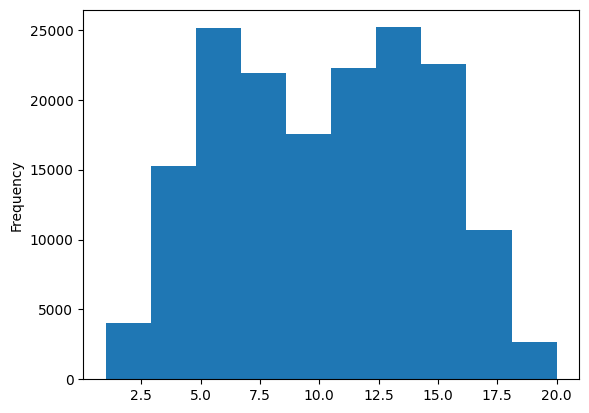

In [92]:
walkability_df['NatWalkInd'].plot(kind='hist')
#Bimodal distribution of National Walk Index score

<Axes: ylabel='Frequency'>

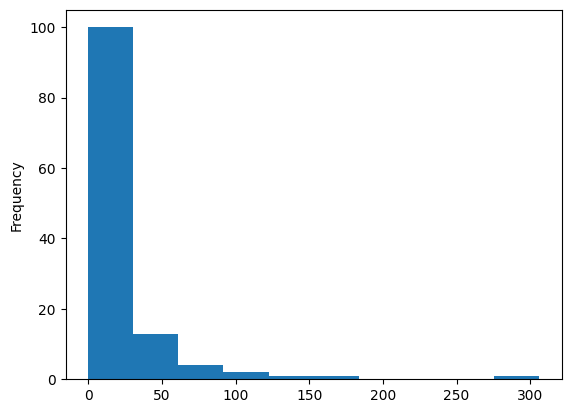

In [95]:
worst_df['AutoOwn0'].plot(kind='hist') #Not many people in the worst walkable areas own 0 vehicles

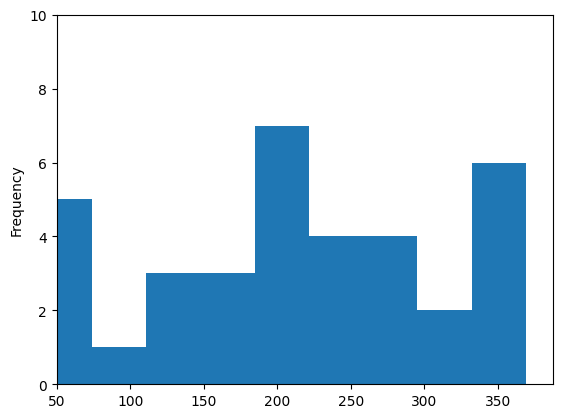

In [110]:
worst_df['AutoOwn2p'].plot(kind='hist')
plt.xlim(xmin=50)
plt.ylim(ymax=10)
plt.show() #lots of vehicles in worst walkable areas

<Axes: ylabel='Frequency'>

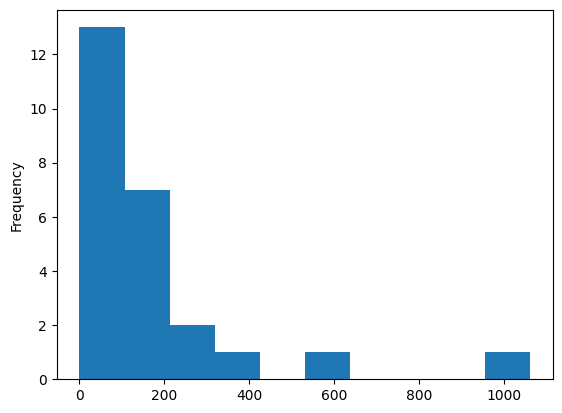

In [102]:
perfect_df['AutoOwn0'].plot(kind='hist')
#it is very common for the best walkable areas to have very low vehicle ownership

<Axes: ylabel='Frequency'>

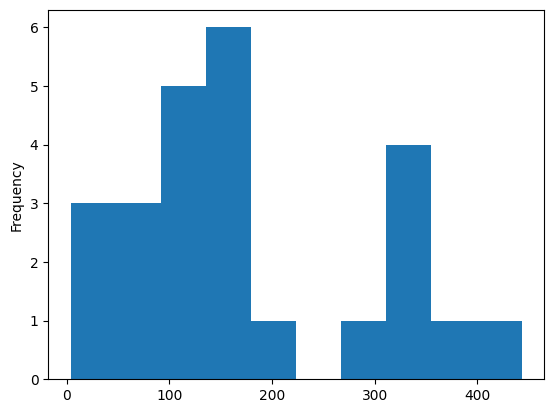

In [107]:
perfect_df['AutoOwn2p'].plot(kind='hist')
#much lower fequency than worst_df

# Now let's look at the relationship between each of the four selected variables that contribute to final walkability score and personal vehicle ownership for each of our DataFrames defined above.

The relationsip between zero vehicle ownership and intersection density for worst walkable areas (walkability score = 1).

<Axes: xlabel='AutoOwn0', ylabel='D3B'>

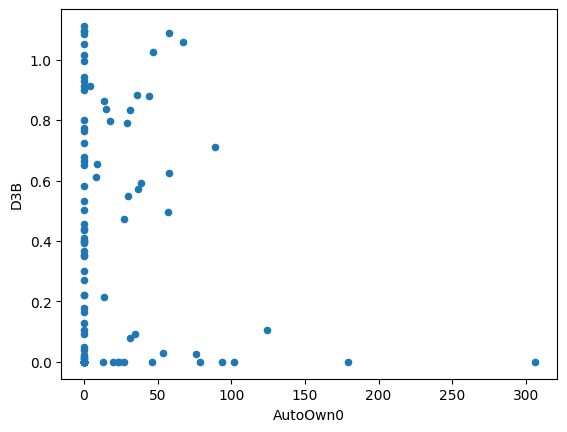

In [89]:
worst_df.plot(x='AutoOwn0', y='D3B', kind='scatter')

The relationsip between zero vehicle ownership and intersection density for best walkable areas (walkability score = 20).

<Axes: xlabel='AutoOwn0', ylabel='D3B'>

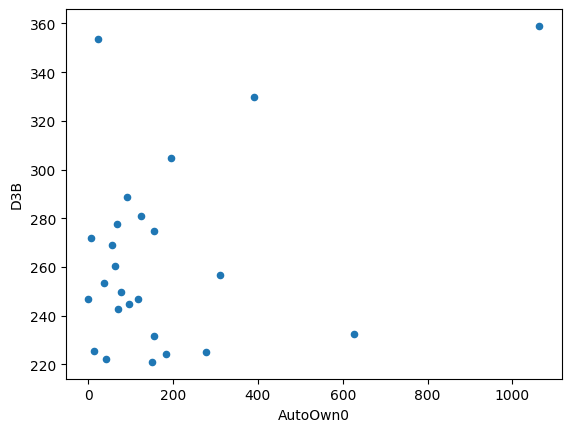

In [90]:
perfect_df.plot(x='AutoOwn0', y='D3B', kind='scatter')
#The relationsip between

The relationsip between percentage of multi-vehicle ownership and intersection density for worst walkable areas.

<Axes: xlabel='Pct_AO2p', ylabel='D3B'>

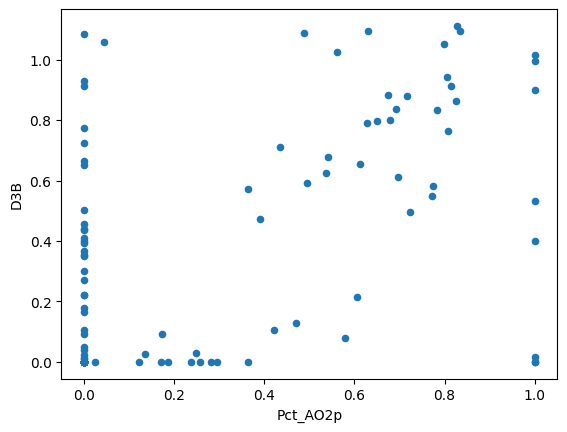

In [81]:
worst_df.plot(x='Pct_AO2p', y='D3B', kind='scatter')

The relationsip between percentage of multi-vehicle ownership and intersection density for best walkable areas.

<Axes: xlabel='Pct_AO2p', ylabel='D3B'>

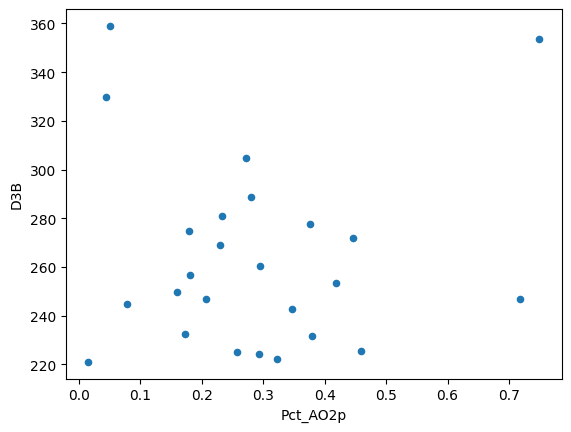

In [82]:
perfect_df.plot(x='Pct_AO2p', y='D3B', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between percentage of single vehicle ownership and intersection density for worst walkable areas.

<Axes: xlabel='Pct_AO1', ylabel='D3B'>

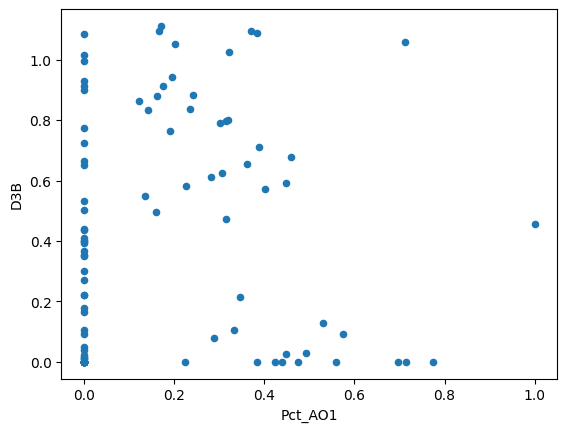

In [83]:
worst_df.plot(x='Pct_AO1', y='D3B', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between percentage of single vehicle ownership and intersection density for best walkable areas.

<Axes: xlabel='Pct_AO1', ylabel='D3B'>

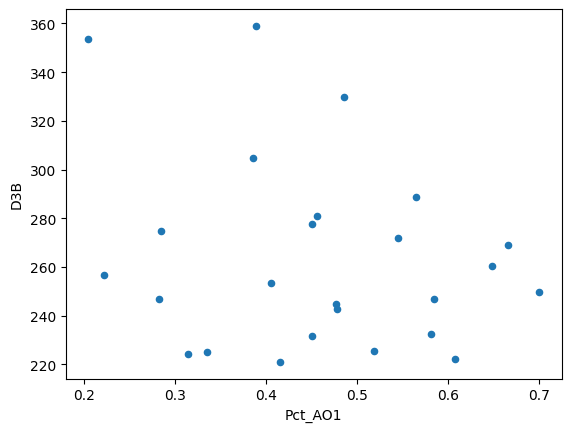

In [84]:
perfect_df.plot(x='Pct_AO1', y='D3B', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between single vehicle ownership and intersection density for entire dataset.

<Axes: xlabel='AutoOwn1', ylabel='D3B'>

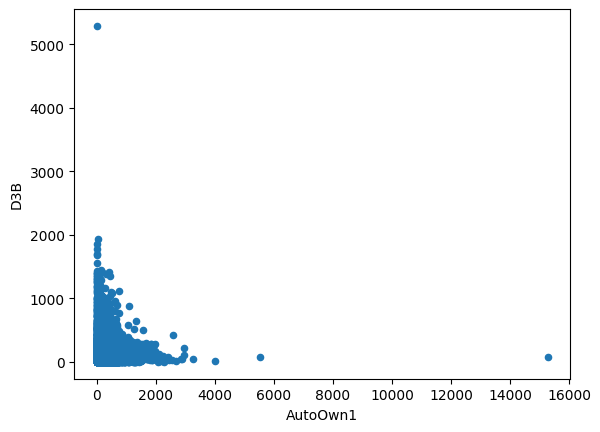

In [86]:
walkability_df.plot(x='AutoOwn1', y='D3B', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between multi-vehicle ownership and intersection density for entire dataset.

<Axes: xlabel='AutoOwn2p', ylabel='D3B'>

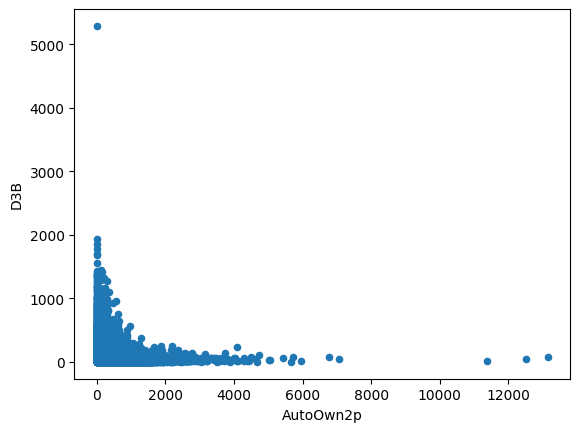

In [88]:
walkability_df.plot(x='AutoOwn2p', y='D3B', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

Two very similar distributions with some extreme outlier values. Let's use seaborn to zoom in and take a better look at the rational function curve fit. Notice the horizontal and vertical asymptotes in the data points.

<function matplotlib.pyplot.show(close=None, block=None)>

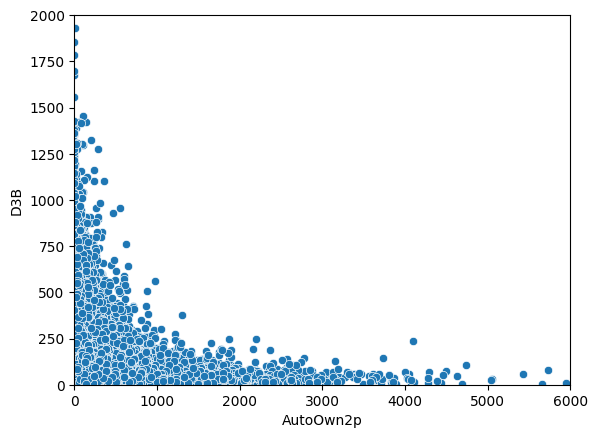

In [60]:
sns.scatterplot(x='AutoOwn2p', y='D3B', data=walkability_df)
plt.xscale('linear')
plt.xlim(0, 6000)
plt.ylim(0, 2000)
plt.show
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between multi-vehicle ownership and employment mix for least walkable areas (walkability range = 1 - 5.75)

<Axes: xlabel='AutoOwn2p', ylabel='D2B_E8MIXA'>

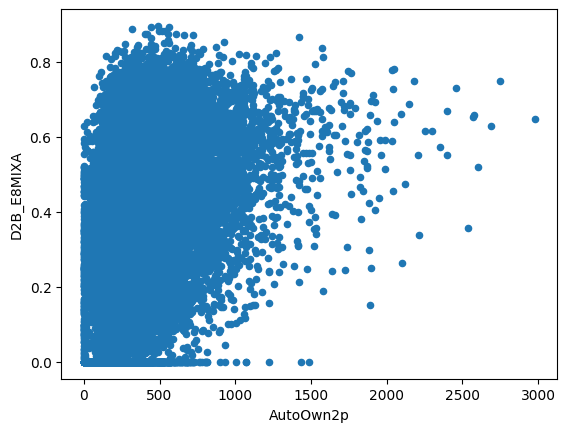

In [61]:
least_walkable_df.plot(x='AutoOwn2p', y='D2B_E8MIXA', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between multi-vehicle ownership and intersection density for least walkable areas (walkability range = 1 - 5.75)



<Axes: xlabel='AutoOwn2p', ylabel='D3B'>

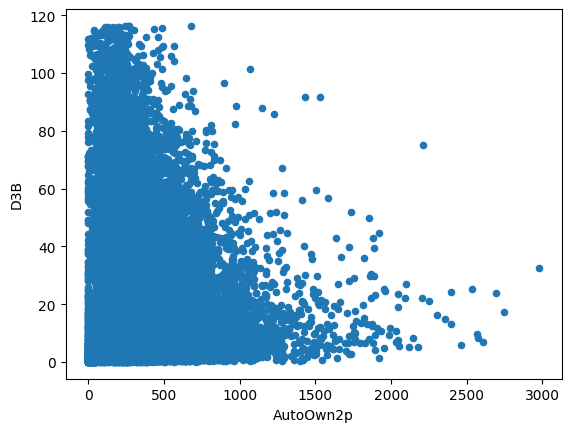

In [66]:
least_walkable_df.plot(x='AutoOwn2p', y='D3B', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between multi-vehicle ownership and intersection density for below average walkable areas (walkability range = 5.76- 10.5)



<Axes: xlabel='AutoOwn2p', ylabel='D3B'>

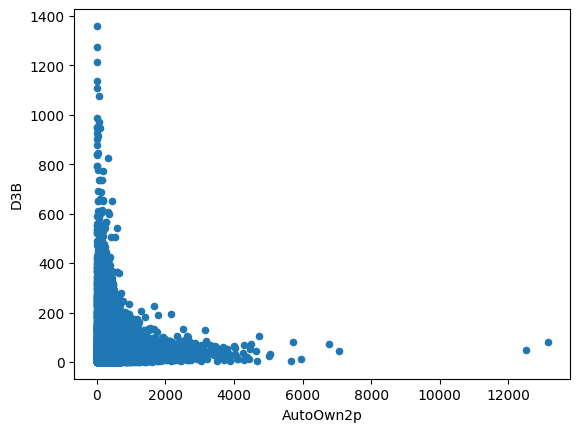

In [67]:
below_average_df.plot(x='AutoOwn2p', y='D3B', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between multi-vehicle ownership and intersection density for above average walkable areas (walkability range = 10.51 - 15.25)



<Axes: xlabel='AutoOwn2p', ylabel='D3B'>

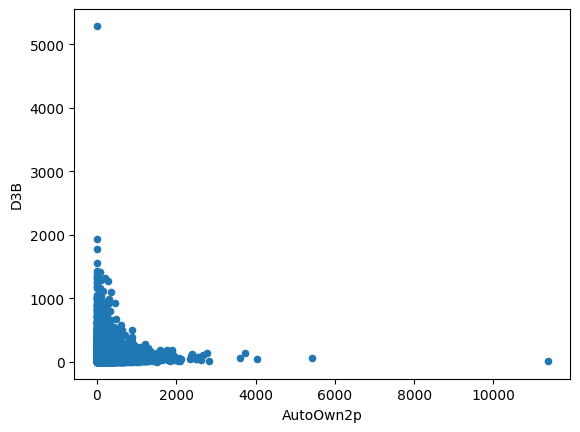

In [68]:
above_average_df.plot(x='AutoOwn2p', y='D3B', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between multi-vehicle ownership and intersection density for most walkable areas (walkability range = 15.26 - 20)



<Axes: xlabel='AutoOwn2p', ylabel='D3B'>

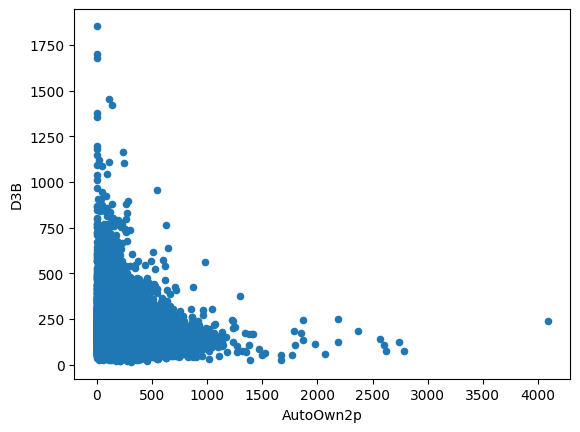

In [69]:
most_walkable_df.plot(x='AutoOwn2p', y='D3B', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between multi-vehicle ownership and employment mix for least walkable areas (walkability range = 0 - 5.75)

<Axes: xlabel='AutoOwn2p', ylabel='D2B_E8MIXA'>

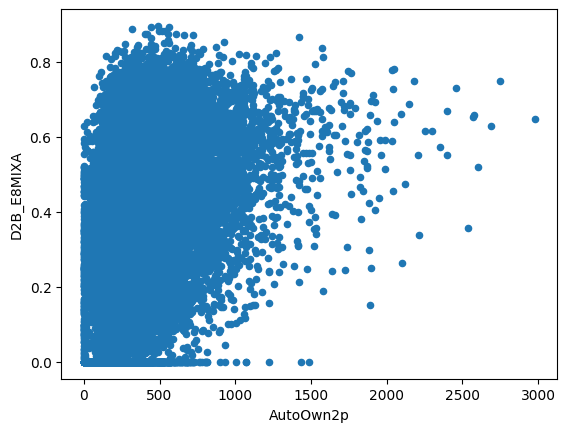

In [71]:
least_walkable_df.plot(x='AutoOwn2p', y='D2B_E8MIXA', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between multi-vehicle ownership and employment and household mix for least walkable areas (walkability range = 0 - 5.75)

<Axes: xlabel='AutoOwn2p', ylabel='D2A_EPHHM'>

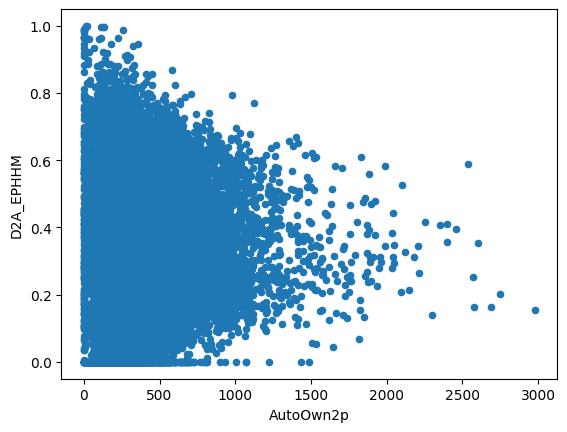

In [72]:
least_walkable_df.plot(x='AutoOwn2p', y='D2A_EPHHM', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between multi-vehicle ownership and employment and household mix for most walkable areas (walkability range = 15.26 - 20)

<Axes: xlabel='AutoOwn2p', ylabel='D2A_EPHHM'>

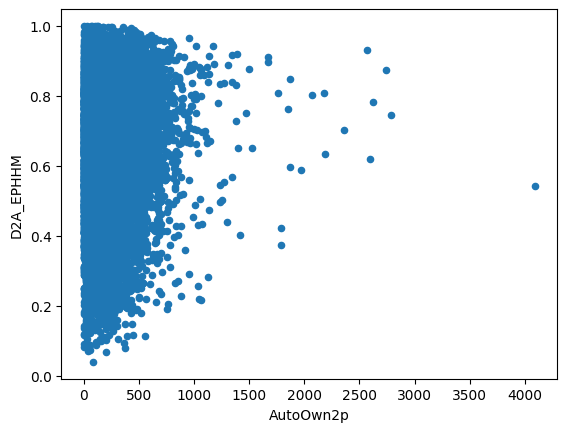

In [112]:
most_walkable_df.plot(x='AutoOwn2p', y='D2A_EPHHM', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

#Now let's look at the relationship between employment and household mix and intersection density for each of our DataFrames defined above.

The relationsip between intersection density and employment and household mix for least walkable areas (walkability range = 0 - 5.75)

<Axes: xlabel='D3B', ylabel='D2A_EPHHM'>

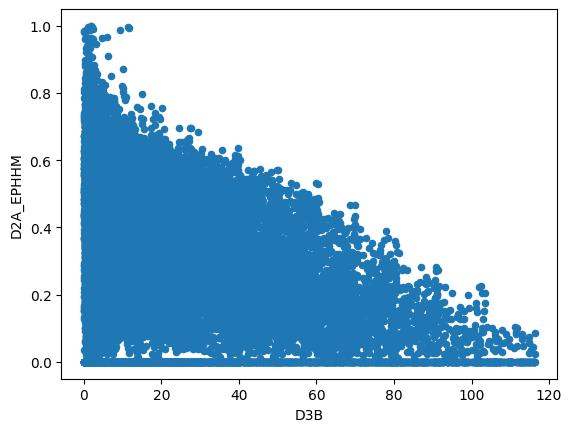

In [116]:
least_walkable_df.plot(x='D3B', y='D2A_EPHHM', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between intersection density and employment and household mix for most walkable areas (walkability range = 15.26 - 20)

<Axes: xlabel='D3B', ylabel='D2A_EPHHM'>

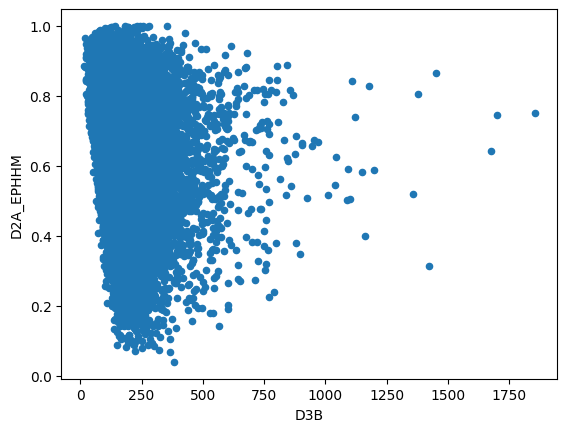

In [117]:
most_walkable_df.plot(x='D3B', y='D2A_EPHHM', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between intersection density and employment and household mix for worst walkable areas (walkability score = 1)

<Axes: xlabel='D3B', ylabel='D2A_EPHHM'>

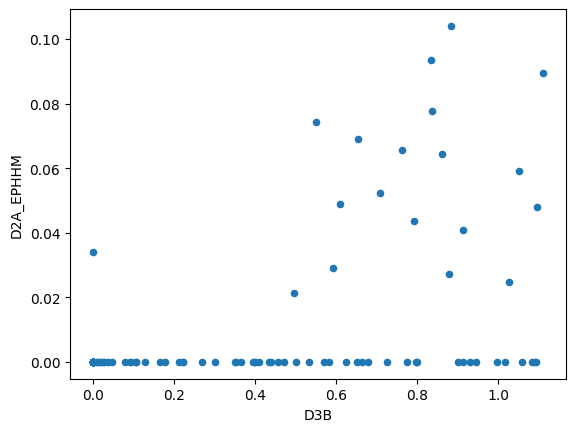

In [119]:
worst_df.plot(x='D3B', y='D2A_EPHHM', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between intersection density and employment and household mix for best walkable areas (walkability score = 20)

<Axes: xlabel='D3B', ylabel='D2A_EPHHM'>

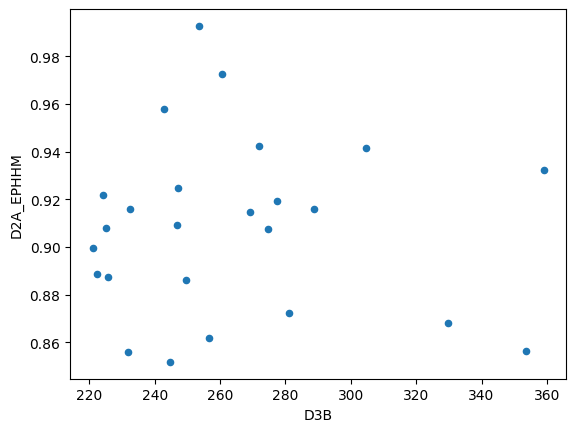

In [118]:
perfect_df.plot(x='D3B', y='D2A_EPHHM', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

#Lets compare multi-vehicle ownership to employment and household mix for the various DataFrames

The relationsip between multi-vehicle ownership and employment and household mix for worst walkable areas (walkability score = 1)

<Axes: xlabel='AutoOwn2p', ylabel='D2A_EPHHM'>

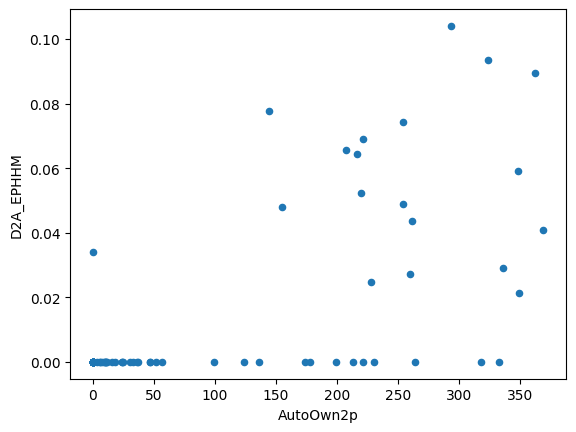

In [114]:
worst_df.plot(x='AutoOwn2p', y='D2A_EPHHM', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between multi-vehicle ownership and employment and household mix for best walkable areas (walkability score = 20)

<Axes: xlabel='AutoOwn2p', ylabel='D2A_EPHHM'>

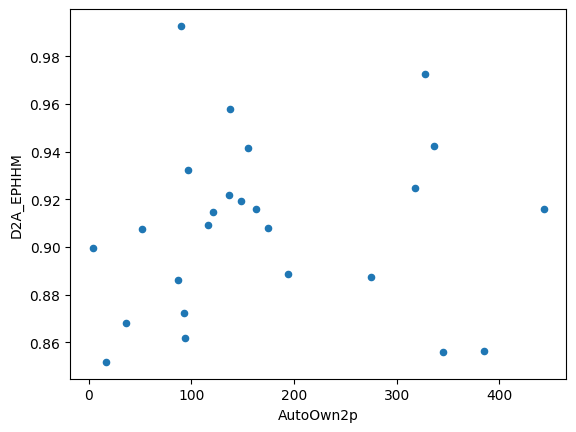

In [113]:
perfect_df.plot(x='AutoOwn2p', y='D2A_EPHHM', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

#Now lets take a look at how intersection density impacts walkability score

The relationsip between intersection density and final walkability score for least walkable areas (walkability range = 1 - 5.75)

<Axes: xlabel='D3B', ylabel='NatWalkInd'>

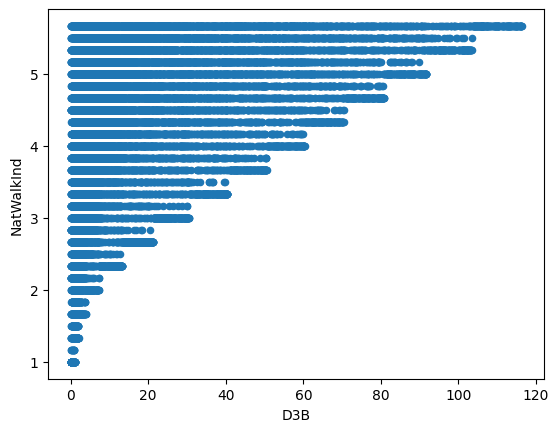

In [120]:
least_walkable_df.plot(x='D3B', y='NatWalkInd', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between intersection density and final walkability score for most walkable areas (walkability range = 15.26 - 20)

<Axes: xlabel='D3B', ylabel='NatWalkInd'>

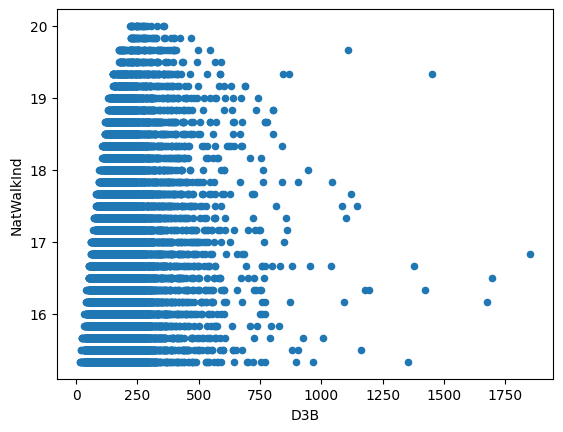

In [122]:
most_walkable_df.plot(x='D3B', y='NatWalkInd', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between employment and household mix and intersection density for worst walkable areas (walkability score = 1)

<Axes: xlabel='D2A_EPHHM', ylabel='D3B'>

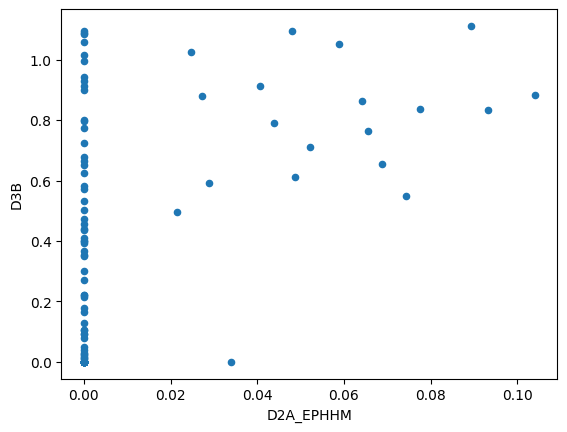

In [28]:
worst_df.plot(x='D2A_EPHHM', y='D3B', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

The relationsip between employment and household mix and intersection density for best walkable areas (walkability score = 20)

<Axes: xlabel='D2A_EPHHM', ylabel='D3B'>

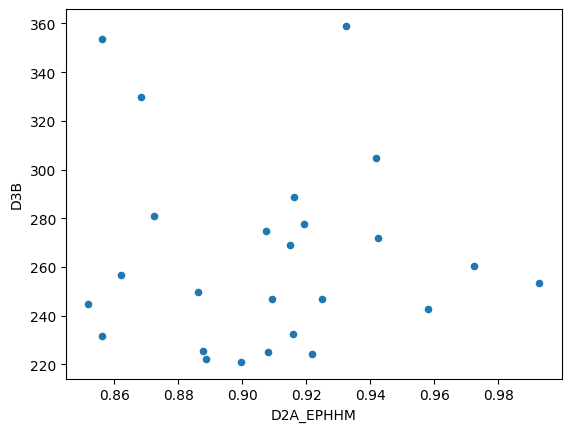

In [121]:
perfect_df.plot(x='D2A_EPHHM', y='D3B', kind='scatter')
#vars 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A'

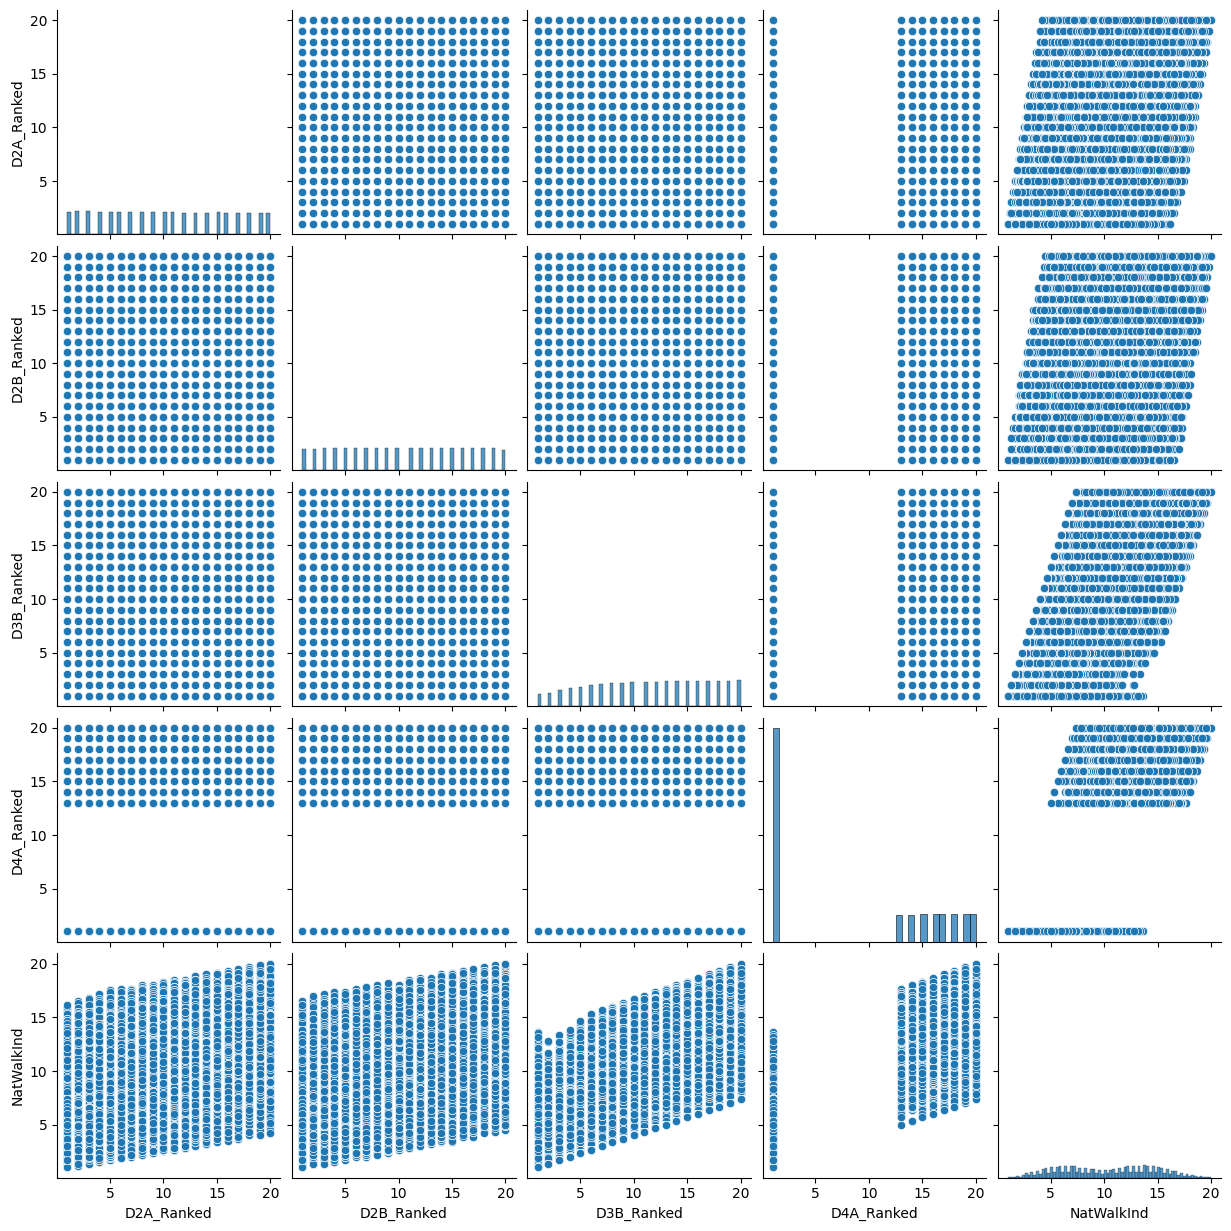

In [25]:
sns.pairplot(data=significant_columns)

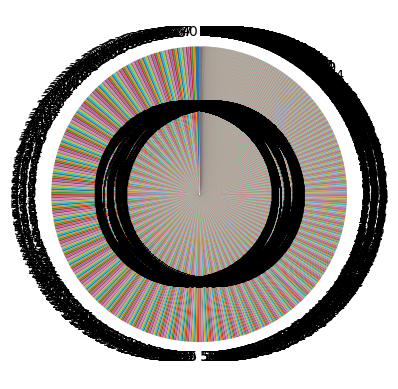

In [99]:
combined_categories = walkability_df['AutoOwn0'] + walkability_df['AutoOwn1'] + walkability_df['AutoOwn2p']
combined_categories.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.show() #demon spawn???

#Storytelling and Reflections

Despite my efforts in crafting an array of visualizations, ranging from scatter plots to histograms, the sheer size and intricacy of the dataset posed significant challenges. The vast amount of data points, coupled with the multitude of variables, made it challenging to draw definitive conclusions. While the visualizations undoubtedly highlighted noticeable differences among variables and DataFrames, synthesizing meaningful insights proved elusive. The intricate interplay of numerous factors and the inherent complexity of the dataset underscored the need for advanced analytical techniques and further exploration to extract conclusive findings and actionable insights.

At the very least, I can discuss some of the most distinguishable differences in the visualizations above and how they might prove some of the more predictable knowledge obtained from the data.

Firstly, some significant findings from the initial EPA report:



1.    Higher intersection density is correlated with
more walk trips.
2.   Shorter distances from a population center to the nearest transit stop correlate with more walk trips.
3.   Higher mix of employment types (such as retail, office, or industrial) is correlated with
more walk trips.
4.   More diversity of employment types plus many occupied housing units is correlated with
more walk trips.

My first histogram visualizations compare the frequency of vehicle ownership between areas with the worst and best walkability. The areas with the best walkability clearly had the lowest vehicle ownership and the areas with the worst walkability had the highest vehicle ownership.

The scatterplots following the histograms show that areas with better walkability tend to have higher intersection density with lower vehicle ownership and areas with worse walkability tend to have lower intersection density with higher vehicle ownership. Additionally, lower vehicle ownership typically means higher employment and household mix.

 For the least walkable areas, as intersection density increased, employment and household mix dropped. For the most walkable areas, the opposite was true, as intersection density brought higher values for employment and household mix.

 Higher vehicle ownership in the worst walkable areas actually contributed to higher values of emoloyment and household mix, while lower vehicle ownership in the most walkable areas brought generally higher values of employment and household mix.

 Sadly, I could not produce any adequate visualizations that included the variable for proximity to transit stops, which I was most intersted in. Public transport and low vehicle ownership is essential for incentivising pedestrian travel, and I am a huge supporter of trains and mass transit over very inefficient personal vehicle travel.






# Impact

There are a lot of limitations to this work. Most notably, over a quarter of the dataset was blatantly disregarded due to missing values, which could have been corrected in many ways that I lack the experience to implement. My visualizations are nowhere near as conclusive as I had hoped them to turn out, and there is very weak correlation between the variables compared. Frankly, I lack the statistical expertise to interpret this extremely complex data any further, but this dataset, in the hands of a professional data scientist unlike myself, is incredibly useful for analyzing and comparing communities’ walkability and providing transparent insight into what makes a community walkable in hopes that citizens and community leaders will desire to design walkable neighborhoods to improve overall quality of life.

# References

Original Dataset Source and Info: https://catalog.data.gov/dataset/walkability-index1

ChatGPT was imensely helpful for efficiently exploring this dataset by correcting my silly syntax errors as well as explaining other errors and the functionality of each line of code in great detail to further my understanding and learning of this invaluable material.

# To make up for what lacks of my visualizations, lets have some fun and explore some unique values of this dataset that hit a little closer to home.

What is the average walkability score for the State of North Carolina? (Scale: 1 - 20)

In [123]:
walkability_df.loc[walkability_df['STATEFP'] == 37, 'NatWalkInd'].mean()
#Below average :(

7.614683596171615

What is the average ranked proximity to transit score for the State of North Carolina?

In [159]:
walkability_df.loc[walkability_df['STATEFP'] == 37, 'D4A_Ranked'].mean()
#Very low!!

3.7407331558468155

What is the average walkability score for the Charlotte-Concord Census Area?

In [124]:
walkability_df.loc[walkability_df['CSA_Name'] == 'Charlotte-Concord, NC-SC', 'NatWalkInd'].mean()
#Above the state average! Nice

8.136293351064282

How about Raleigh-Durham-Cary?

In [126]:
walkability_df.loc[walkability_df['CSA_Name'] == 'Raleigh-Durham-Cary, NC', 'NatWalkInd'].mean()
#Much higher. Raleigh >>>>>> Charlotte

9.120260021683642

What about a smaller city like Greensboro? (my hometown)

In [125]:
walkability_df.loc[walkability_df['CSA_Name'] == 'Greensboro--Winston-Salem--High Point, NC', 'NatWalkInd'].mean()
#Below state average booooo

6.703984819751423

How about Fayettnam, a rural coastal plains town where my dad grew up?

In [127]:
walkability_df.loc[walkability_df['CSA_Name'] == 'Fayetteville-Sanford-Lumberton, NC', 'NatWalkInd'].mean()
#Even worse than the G

6.037755102022449

Lets find out what contributes to this score. First, lets start with average ranked proximity to transit score.

In [129]:
walkability_df.loc[walkability_df['CSA_Name'] == 'Fayetteville-Sanford-Lumberton, NC', 'D4A_Ranked'].mean()
#Good grief, the absolute worst!

1.0

Now lets try intersection density.

In [130]:
walkability_df.loc[walkability_df['CSA_Name'] == 'Fayetteville-Sanford-Lumberton, NC', 'D3B_Ranked'].mean()
#A little higher

6.881632653061224

Now for employment mix.

In [131]:
walkability_df.loc[walkability_df['CSA_Name'] == 'Fayetteville-Sanford-Lumberton, NC', 'D2B_Ranked'].mean()

10.491836734693878

Last but not least, employment AND housing mix.

In [132]:
walkability_df.loc[walkability_df['CSA_Name'] == 'Fayetteville-Sanford-Lumberton, NC', 'D2A_Ranked'].mean()

9.971428571428572

Lets test the formula!

Final National Walkability Index score = (6.881632653061224/3) + (1.0/3) + (10.491836734693878/6) + (9.971428571428572/6) = 6.0377551 = 6.037755102022449

Yup! It's the same value

Notice the huge population difference between Charlotte-Concord and Fayetteville, which might explain the Walkability score.

In [136]:
walkability_df.loc[walkability_df['CSA_Name'] == 'Charlotte-Concord, NC-SC', 'CBSA_POP'].mean()


2301602.2882703776

In [137]:
walkability_df.loc[walkability_df['CSA_Name'] == 'Fayetteville-Sanford-Lumberton, NC', 'CBSA_POP'].mean()

337313.94693877554

How many times does North Carolina appear in the worst_df dataframe, where every location has the absolute worst walkability score of 1?

In [150]:
worst_df[worst_df['STATEFP'] == 37].shape[0]

3

Lets peek at these three locations.

In [152]:
worst_df[worst_df['STATEFP'] == 37]
#step it up, Asheville!

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
166333,166334,3.708800e+11,3.708800e+11,37,87,980100,1,120.0,"Asheville-Marion-Brevard, NC",11700.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,86352.29538,2.475208e+08
167422,167423,3.709000e+11,3.709000e+11,37,89,980100,1,120.0,"Asheville-Marion-Brevard, NC",11700.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,53600.39972,5.133336e+07
170195,170196,3.703200e+11,3.703200e+11,37,31,980100,1,404.0,"New Bern-Morehead City, NC",33980.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,182641.48170,2.450994e+08


Any places in North Carolina that have perfect walkability score?

In [153]:
perfect_df[perfect_df['STATEFP'] == 37].shape[0]
#NOPE...

0

Are we at least in the most walkable range? (15.26 - 20)

In [155]:
most_walkable_df[most_walkable_df['STATEFP'] == 37].shape[0]
#Yuhhhh

208

What's the highest walkablity score in the entire state of North Carolina?

In [156]:
most_walkable_df[most_walkable_df['STATEFP'] == 37]['NatWalkInd'].max()
#Daaanggg, almost perfect!

19.66666667

Who takes home first place in the NC State Walkability Championship?

In [157]:
index_of_max_value = most_walkable_df[most_walkable_df['STATEFP'] == 37]['NatWalkInd'].idxmax()
most_walkable_df.loc[index_of_max_value, 'CSA_Name']
#RALEIGH ON TOP BABY

'Raleigh-Durham-Cary, NC'

In [140]:
worst_df

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
779,780,4.803000e+11,4.803000e+11,48,29,980005,1,484.0,"San Antonio-New Braunfels-Pearsall, TX",41700.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,46477.025900,3.958327e+07
1785,1786,4.803970e+11,4.803970e+11,48,39,664501,1,288.0,"Houston-The Woodlands, TX",26420.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,50469.752080,9.753518e+07
3097,3098,4.803970e+11,4.803970e+11,48,39,663000,3,288.0,"Houston-The Woodlands, TX",26420.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,26798.695250,2.686875e+07
8394,8395,4.807170e+11,4.807170e+11,48,71,710600,1,288.0,"Houston-The Woodlands, TX",26420.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,131560.321100,5.999138e+08
8623,8624,4.814100e+11,4.814100e+11,48,141,10502,1,238.0,"El Paso-Las Cruces, TX-NM",21340.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,74700.760780,2.433289e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219791,219792,7.209710e+11,7.209710e+11,72,97,81512,1,364.0,"Mayagüez-San Germán, PR",32420.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,58790.057170,8.801709e+07
220053,220054,7.203110e+11,7.203110e+11,72,31,50107,1,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,1054.166094,6.738555e+04
220100,220101,7.212700e+11,7.212700e+11,72,127,4306,2,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,1775.874284,7.597139e+04
220340,220341,7.203110e+11,7.203110e+11,72,31,50212,5,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,1270.520805,5.907850e+04


In [139]:
perfect_df

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
10123,10124,4.811300e+11,4.811300e+11,48,113,18802,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.200909,0.000631,0.182804,20,20,20,20,20.0,3998.258290,8.859096e+05
25248,25249,4.019000e+10,4.019000e+10,4,19,400,3,536.0,"Tucson-Nogales, AZ",46060.0,...,0.808161,0.005408,0.842218,20,20,20,20,20.0,5116.192667,8.373000e+05
34840,34841,6.075010e+10,6.075010e+10,6,75,10200,3,488.0,"San Jose-San Francisco-Oakland, CA",41860.0,...,0.445126,0.000683,0.372264,20,20,20,20,20.0,1942.705667,1.294395e+05
39730,39731,6.059011e+10,6.059011e+10,6,59,11200,1,348.0,"Los Angeles-Long Beach, CA",31080.0,...,0.235578,0.000137,0.183979,20,20,20,20,20.0,2622.536372,3.659908e+05
41970,41971,6.075023e+10,6.075023e+10,6,75,22704,1,488.0,"San Jose-San Francisco-Oakland, CA",41860.0,...,0.385269,0.000706,0.384582,20,20,20,20,20.0,2160.845126,2.678755e+05
44613,44614,6.111006e+10,6.111006e+10,6,111,5907,1,348.0,"Los Angeles-Long Beach, CA",37100.0,...,0.817210,0.005558,0.580531,20,20,20,20,20.0,4298.135439,9.794072e+05
45925,45926,6.037208e+10,6.037208e+10,6,37,207900,1,348.0,"Los Angeles-Long Beach, CA",31080.0,...,0.763709,0.000366,0.493669,20,20,20,20,20.0,3370.963944,6.266058e+05
47701,47702,6.087101e+10,6.087101e+10,6,87,100700,2,488.0,"San Jose-San Francisco-Oakland, CA",42100.0,...,0.387344,0.006377,0.369710,20,20,20,20,20.0,3605.085150,4.820479e+05
53200,53201,6.059087e+10,6.059087e+10,6,59,87300,5,348.0,"Los Angeles-Long Beach, CA",31080.0,...,0.440783,0.000305,0.410876,20,20,20,20,20.0,3819.019175,4.909185e+05
54017,54018,6.087110e+10,6.087110e+10,6,87,110300,2,488.0,"San Jose-San Francisco-Oakland, CA",42100.0,...,0.424772,0.007510,0.435390,20,20,20,20,20.0,2881.624514,3.380052e+05
